In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os.path as osp

In [2]:
def str_to_float_scores(line):
    return list(map(float, line.split(',')))

In [3]:
save_root = '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/figure'
# record_file = '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/gnn_yelp2018/xgcn_multi/gamma/[bce][res][gamma0.01-k16][gcn_layers=2][1dnn][2layer-ffn][prop1][reg1e-3][T5-K15][load_best=1][USE_SNN=0][endure=5]/train_record.txt'

In [6]:
def get_epochs_and_scores(record_file, metric='r100'):
    score_list = []
    epoch_list = []
    
    with open(record_file, 'r') as f:
        metrics = f.readline().split(',')
        metric_idx = 0
        while metrics[metric_idx] != metric:
            metric_idx += 1
        
        done = False
        while not done:
            line = f.readline()
            if line == '':
                done = True
            elif line[0] == 'a':
                continue
            else:
                x = str_to_float_scores(line)
                s = x[metric_idx]
                epoch = x[-1]
                score_list.append(s)
                epoch_list.append(epoch)
    score_list = np.array(score_list)
    epoch_list = np.array(epoch_list)
    return epoch_list, score_list

In [7]:
epoch_xgcn_multi, score_xgcn_multi = get_epochs_and_scores(
    '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/gnn_taobao-1.6m/xgcn_multi/gamma/[bce][res][gamma0.0-k16][gcn_layers=2][use2refnet=0][2layer-ffn][reg1e-3][T3-K15][load_best=1][USE_SNN=0][endure=10]/train_record.txt',
    'r100')
epoch_xgcn_multi_gamma, score_xgcn_gamma = get_epochs_and_scores(
    '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/gnn_taobao-1.6m/xgcn_multi/gamma/[bce][res][gamma0.01-k16][gcn_layers=2][use2refnet=0][2layer-ffn][reg1e-3][T3-K15][load_best=1][USE_SNN=0][endure=10]/train_record.txt',
    'r100')
epoch_ultragcn, score_ultragcn = get_epochs_and_scores(
    '/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/gnn_taobao-1.6m/ultragcn/[lambda1.4][gamma1.5][reg1e-5][neg64-weight64][K8]_v100/train_record.txt',
    'r100')

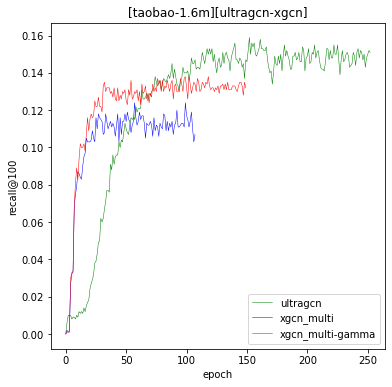

In [9]:
fig, axs = plt.subplots(1 , 1, figsize=(6, 6))

ax = axs

ax.plot(epoch_ultragcn, score_ultragcn, 'g', linewidth=0.5, markersize=1, label='ultragcn')
ax.plot(epoch_xgcn_multi, score_xgcn_multi, 'b', linewidth=0.5, markersize=1, label='xgcn_multi')
ax.plot(epoch_xgcn_multi_gamma, score_xgcn_gamma, 'r', linewidth=0.5, markersize=1, label='xgcn_multi-gamma')

ax.set_xlabel('epoch')
ax.set_ylabel('recall@100')
ax.legend(loc='lower right')

title = '[taobao-1.6m][ultragcn-xgcn]'
plt.title(title)

plt.savefig(osp.join(save_root, title + '.pdf'), 
            dpi=300,  bbox_inches='tight')
plt.show()